In [2]:
import os
import shutil
import random

In [3]:
dataset_path = "./Dataset"

In [4]:
for category_folder in os.listdir(dataset_path):
    print(category_folder)

Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus


In [6]:
desired_num_images = 1000

In [7]:
for category_folder in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category_folder)

    # Check if it's a directory
    if os.path.isdir(category_path):
        # Get a list of all images in the category folder
        all_images = os.listdir(category_path)

        # If there are more than desired_num_images, randomly select only desired_num_images
        if len(all_images) > desired_num_images:
            selected_images = random.sample(all_images, desired_num_images)
            for image in all_images:
                if image not in selected_images:
                    image_path = os.path.join(category_path, image)
                    os.remove(image_path)
                    

In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

In [8]:
splitfolders.ratio(dataset_path, output="output",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 10000 files [01:08, 146.94 files/s]


In [10]:
IMAGE_SIZE = 256
CHANNELS = 3

In [11]:
# without data augmentation 

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    './output/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 8000 images belonging to 10 classes.


In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    './output/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'output/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [13]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [14]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

In [15]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [17]:
model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
8000/32

250.0

In [19]:
1000/32

31.25

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=250,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=31,
    verbose=1,
    epochs=1,
)



250/250 [==============================] - 186s 738ms/step - loss: 2.0860 - accuracy: 0.2089 - val_loss: 1.6878 - val_accuracy: 0.4204


first image to predict
actual label: Tomato_Leaf_Mold
1/1 [==============================] - 0s 299ms/step
predicted label: Tomato_Leaf_Mold


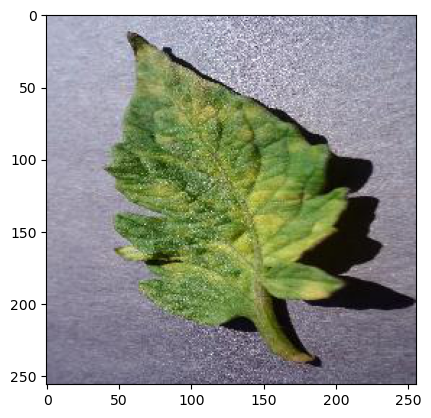

In [21]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 41ms/step


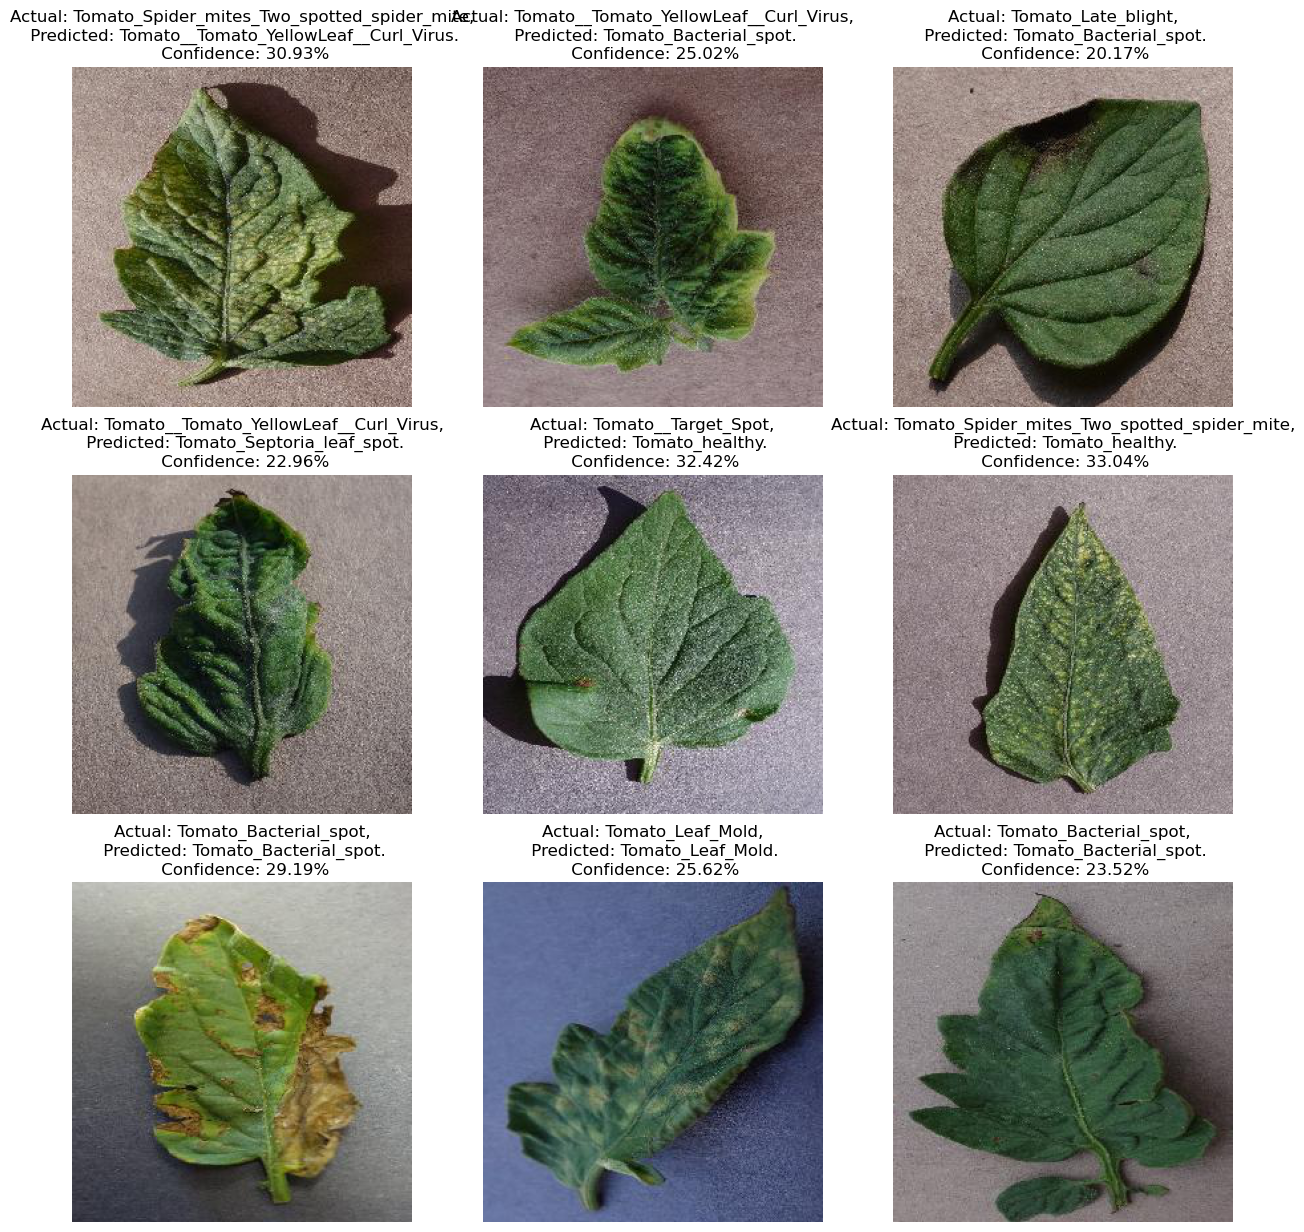

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [24]:
# Evaluate the model on the test set
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = test_generator.classes

32/32 [==============================] - 11s 353ms/step


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print("Classification Report:\n", classification_report(true_classes, predicted_classes))
print("\nConfusion Matrix:\n", confusion_matrix(true_classes, predicted_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.32      0.23       100
           1       0.20      0.20      0.20       100
           2       0.21      0.06      0.09       100
           3       0.10      0.15      0.12       100
           4       0.14      0.11      0.12       100
           5       0.11      0.12      0.11       100
           6       0.20      0.01      0.02       100
           7       0.12      0.11      0.11       100
           8       0.11      0.07      0.09       100
           9       0.10      0.21      0.14       100

    accuracy                           0.14      1000
   macro avg       0.15      0.14      0.12      1000
weighted avg       0.15      0.14      0.12      1000


Confusion Matrix:
 [[32  6  1 16  6  5  1  5  7 21]
 [14 20  2 10  8 12  2  3  7 22]
 [18  7  6 20  8 12  0  8  4 17]
 [17 14  4 15  5 12  0 11  5 17]
 [17  4  1  9 11 18  1 11  9 19]
 [ 9 12  3 15  6 12  0 14  4 25]